# Nikita Tejwani
### HUDK 4050: Core Methods in Educational Data Mining
### Fall 2021

##### *Assignment 1: Individual Coding Assignment (ICE) 1*

In [15]:
#Import the function - emojize from the package - emoji

from emoji import emojize

print(emojize(":laptop::thumbs_up:"))

#Import packages that are useful for data analysis
import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

💻👍


##### BASIC DATA TYPES

In [16]:
print("\"This\" is a string")
print("2 is an int")
print("15.5 is a float")
print("True is a boolean")
print("[\"This\", 2, 15.5, True] is a list")

"This" is a string
2 is an int
15.5 is a float
True is a boolean
["This", 2, 15.5, True] is a list


##### CREATING ARRAYS

In [29]:
#Creating a list

list_1 = list(range(10))
print(list_1, " is a list")

#Creating a numpy array

array_1 = np.array(list_1, dtype = int)
print(array_1, " is an array")

#Creating an array of zero values
array_2 = np.zeros(10, dtype = int)
print(array_2, "is an array of zeros.  This can be used to initialize a series in which values are not yet known")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  is a list
[0 1 2 3 4 5 6 7 8 9]  is an array
[0 0 0 0 0 0 0 0 0 0] is an array of zeros.  This can be used to initialize a series in which values are not yet known


##### PANDAS OBJECTS

In [51]:
#Definitions: Series and DataFrame
print("Series:\t\t One dimensional array of indexed data\nDataFrame:\t Two dimensional array with flexible indeces and column names\n")
print("-----------------")

#Series Example

S = pd.Series(np.random.randint(0, 10, 4))
print("Series:\n")
print(S)
print("-----------------")

#DataFrame Example

df = pd.DataFrame(np.random.randint(0, 10, (4, 5)))
print("\nData Frame:\n")
print(df)

Series:		 One dimensional array of indexed data
DataFrame:	 Two dimensional array with flexible indeces and column names

Series:

0    3
1    1
2    4
3    6
dtype: int32
-----------------

Data Frame:

   0  1  2  3  4
0  2  8  8  3  1
1  2  8  9  3  8
2  2  4  6  2  1
3  0  9  2  8  0


##### IMPORTING DATA

In [61]:
#Importing what I assume is school progress report data
import os
os.getcwd()
df = pd.read_csv("ICE1_Data.csv")

,DBN,Quality_Review_Score,Progress_Rpt_10-11,Student_Progress_10-11,graduation 2010-11,college enroll 2010-11
0,01M292,Developing,C,C,0.563,0.519
1,01M448,Developing,C,B,0.707,0.363
2,01M450,Well Developed,A,B,0.716,0.692
3,01M509,Proficient,C,C,0.564,0.477
4,01M539,Proficient,A,A,0.953,0.870
...,...,...,...,...,...,...
417,10X696,Well Developed,A,A,1.000,0.936
418,13K430,Proficient,B,B,0.977,0.867
419,10X445,Well Developed,A,A,1.000,0.994
420,14K449,Well Developed,B,B,0.914,0.961


##### ANALYZING DATA

In [68]:
#Summary statistics
print("BASIC STATISTICAL MEASURES")
print(df.describe(include = 'all'))

print("\nCOUNTS OF QUALITY_REVIEW_SCORE")
print(df['Quality_Review_Score'].value_counts())

BASIC STATISTICAL MEASURES
           DBN Quality_Review_Score Progress_Rpt_10-11 Student_Progress_10-11  \
count      422                  368                310                    310   
unique     422                    6                  5                      5   
top     27Q324           Proficient                  A                      C   
freq         1                  186                109                     93   
mean       NaN                  NaN                NaN                    NaN   
std        NaN                  NaN                NaN                    NaN   
min        NaN                  NaN                NaN                    NaN   
25%        NaN                  NaN                NaN                    NaN   
50%        NaN                  NaN                NaN                    NaN   
75%        NaN                  NaN                NaN                    NaN   
max        NaN                  NaN                NaN                    NaN   



##### VISUALIZING DATA

<AxesSubplot:xlabel='Quality_Review_Score'>

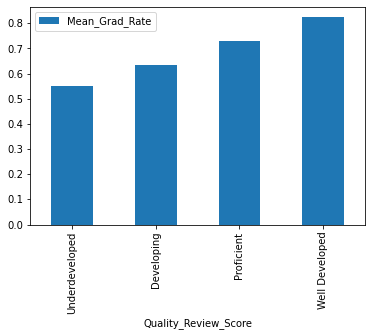

In [164]:
#Making a bar graph showing the trends in school quality score and average graduation rate

bar_graph = df.groupby('Quality_Review_Score')['graduation 2010-11'].mean()
bar_graph = bar_graph.to_frame()
bar_graph.reset_index(inplace = True)
bar_graph.columns = ['Quality_Review_Score', 'Mean_Grad_Rate']

#Two values for quality review score were dropped because they were only applicable in certain years
bar_graph.drop([1, 4], axis = 0, inplace = True)
bar_graph.sort_values(by = "Mean_Grad_Rate", inplace = True)
bar_graph.plot.bar(x = 'Quality_Review_Score', y = 'Mean_Grad_Rate')